# This is a sample Jupyter Notebook

Below is an example of a code cell. 
Put your cursor into the cell and press Shift+Enter to execute it and select the next one, or click 'Run Cell' button.

Press Double Shift to search everywhere for classes, files, tool windows, actions, and settings.

To learn more about Jupyter Notebooks in PyCharm, see [help](https://www.jetbrains.com/help/pycharm/ipython-notebook-support.html).
For an overview of PyCharm, go to Help -> Learn IDE features or refer to [our documentation](https://www.jetbrains.com/help/pycharm/getting-started.html).

In [4]:
print("Hello World!")


Hello World!


In [5]:
import tensorflow as tf
tf.config.list_physical_devices("GPU")

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [6]:
!wget --no-check-certificate \
    https://storage.googleapis.com/learning-datasets/rps.zip \
    -O /tmp/rps.zip

!wget --no-check-certificate \
    https://storage.googleapis.com/learning-datasets/rps-test-set.zip \
    -O /tmp/rps-test-set.zip

--2025-09-13 14:07:12--  https://storage.googleapis.com/learning-datasets/rps.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.251.37.187, 142.250.187.59, 142.250.201.251, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.251.37.187|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 200682221 (191M) [application/zip]
Saving to: ‘/tmp/rps.zip’

/tmp/rps.zip        100%[===================>] 191.38M  8.64MB/s    in 20s     

2025-09-13 14:07:33 (9.54 MB/s) - ‘/tmp/rps.zip’ saved [200682221/200682221]

--2025-09-13 14:07:33--  https://storage.googleapis.com/learning-datasets/rps-test-set.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.250.187.59, 142.250.201.251, 142.250.200.187, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.250.187.59|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 29516758 (28M) [application/zip]
Saving to: ‘/tmp/rps-test-set.zip’

/tmp/r

In [7]:
import zipfile

training_zip_path = "/tmp/rps.zip"
test_zip_path = "/tmp/rps-test-set.zip"
extraction_directory_path = "/tmp/"

with zipfile.ZipFile(training_zip_path, "r") as training_zip_archive:
    training_zip_archive.extractall(extraction_directory_path)

with zipfile.ZipFile(test_zip_path, "r") as test_zip_archive:
    test_zip_archive.extractall(extraction_directory_path)

In [8]:
import os

base_training_directory_path = "/tmp/rps"
rock_training_directory_path = os.path.join(base_training_directory_path, "rock")
paper_training_directory_path = os.path.join(base_training_directory_path, "paper")
scissors_training_directory_path = os.path.join(base_training_directory_path, "scissors")

rock_training_file_names = os.listdir(rock_training_directory_path)
paper_training_file_names = os.listdir(paper_training_directory_path)
scissors_training_file_names = os.listdir(scissors_training_directory_path)

print("total training rock images:", len(rock_training_file_names))
print("total training paper images:", len(paper_training_file_names))
print("total training scissors images:", len(scissors_training_file_names))

print(rock_training_file_names[:10])
print(paper_training_file_names[:10])
print(scissors_training_file_names[:10])

total training rock images: 840
total training paper images: 840
total training scissors images: 840
['rock04-059.png', 'rock01-108.png', 'rock04-065.png', 'rock05ck01-067.png', 'rock05ck01-073.png', 'rock04-071.png', 'rock05ck01-098.png', 'rock02-008.png', 'rock07-k03-013.png', 'rock02-034.png']
['paper03-088.png', 'paper05-026.png', 'paper05-032.png', 'paper03-077.png', 'paper03-063.png', 'paper02-099.png', 'paper04-037.png', 'paper04-023.png', 'paper02-066.png', 'paper02-072.png']
['testscissors03-040.png', 'testscissors03-054.png', 'testscissors03-068.png', 'testscissors03-083.png', 'testscissors03-097.png', 'scissors03-113.png', 'scissors03-107.png', 'testscissors02-051.png', 'testscissors02-045.png', 'scissors01-002.png']


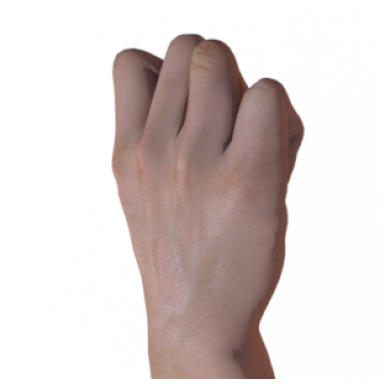

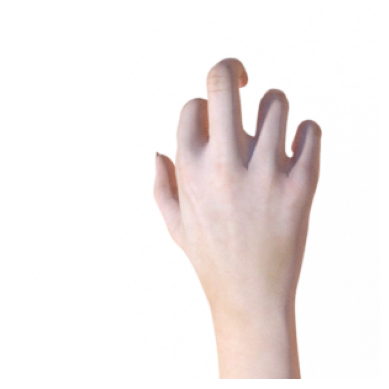

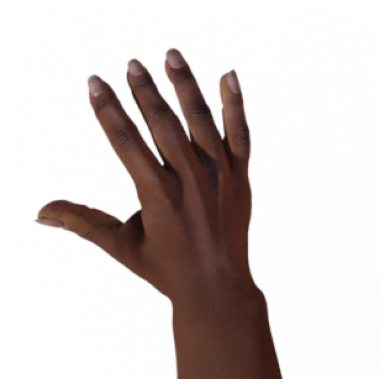

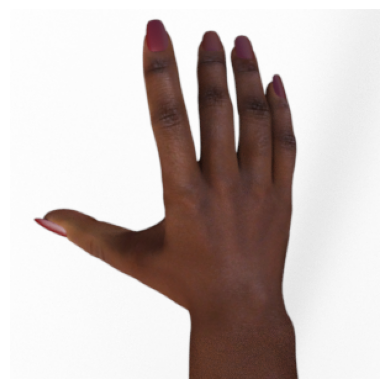

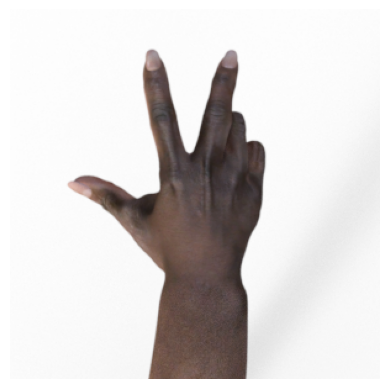

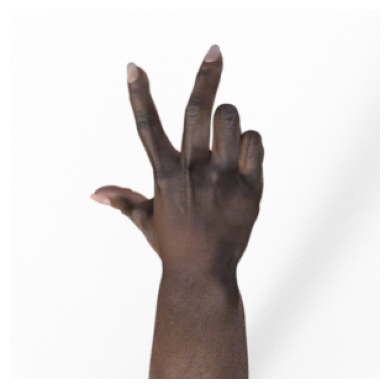

In [9]:
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

preview_slice_end_index = 2

rock_preview_image_paths = [
    os.path.join(rock_training_directory_path, file_name)
    for file_name in rock_training_file_names[preview_slice_end_index - 2 : preview_slice_end_index]
]
paper_preview_image_paths = [
    os.path.join(paper_training_directory_path, file_name)
    for file_name in paper_training_file_names[preview_slice_end_index - 2 : preview_slice_end_index]
]
scissors_preview_image_paths = [
    os.path.join(scissors_training_directory_path, file_name)
    for file_name in scissors_training_file_names[preview_slice_end_index - 2 : preview_slice_end_index]
]

for display_index, image_file_path in enumerate(
    rock_preview_image_paths + paper_preview_image_paths + scissors_preview_image_paths
):
    image_array = mpimg.imread(image_file_path)
    plt.imshow(image_array)
    plt.axis("off")
    plt.show()

In [18]:
import tensorflow as tf
from keras_preprocessing.image import ImageDataGenerator

training_directory_path = "/tmp/rps/"
validation_directory_path = "/tmp/rps-test-set/"

training_image_data_generator = ImageDataGenerator(
    rescale=1.0 / 255.0,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode="nearest",
)

validation_image_data_generator = ImageDataGenerator(rescale=1.0 / 255.0)

training_data_iterator = training_image_data_generator.flow_from_directory(
    training_directory_path,
    target_size=(150, 150),
    class_mode="categorical",
    batch_size=126,
)

validation_data_iterator = validation_image_data_generator.flow_from_directory(
    validation_directory_path,
    target_size=(150, 150),
    class_mode="categorical",
    batch_size=126,
)

classification_model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(64, (3, 3), activation="relu", input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3, 3), activation="relu"),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(128, (3, 3), activation="relu"),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(128, (3, 3), activation="relu"),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(512, activation="relu"),
    tf.keras.layers.Dense(3, activation="softmax"),
])

classification_model.summary()

classification_model.compile(
    loss="categorical_crossentropy",
    optimizer="rmsprop",
    metrics=["accuracy"],
)

training_history = classification_model.fit(
    training_data_iterator,
    epochs=100,
    steps_per_epoch=20,
    validation_data=validation_data_iterator,
    verbose=1,
    validation_steps=3,
)

classification_model.save("rps.h5")

Found 2520 images belonging to 3 classes.
Found 372 images belonging to 3 classes.


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_8 (Conv2D)               │ (None, 148, 148, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 74, 74, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 72, 72, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_9 (MaxPooling2D)  │ (None, 36, 36, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 34, 34, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_10 (MaxPooling2D) │ (None, 17, 17, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 15, 15, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_11 (MaxPooling2D) │ (None, 7, 7, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 6272)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 6272)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 512)            │     3,211,776 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 3)              │         1,539 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,473,475 (13.25 MB)

 Trainable params: 3,473,475 (13.25 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 14s 613ms/step - accuracy: 0.3504 - loss: 1.1564 - val_accuracy: 0.5887 - val_loss: 1.0932 - learning_rate: 0.0010
Epoch 2/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 12s 568ms/step - accuracy: 0.3690 - loss: 1.1310 - val_accuracy: 0.4355 - val_loss: 1.0879 - learning_rate: 0.0010
Epoch 3/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 11s 541ms/step - accuracy: 0.4194 - loss: 1.0782 - val_accuracy: 0.6855 - val_loss: 0.9115 - learning_rate: 0.0010
Epoch 4/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 13s 663ms/step - accuracy: 0.5004 - loss: 1.0074 - val_accuracy: 0.7151 - val_loss: 0.6833 - learning_rate: 0.0010
Epoch 5/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 13s 611ms/step - accuracy: 0.5782 - loss: 0.9217 - val_accuracy: 0.8763 - val_loss: 0.4641 - learning_rate: 0.0010
Epoch 6/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 11s 564ms/step - accuracy: 0.6238 - loss: 0.8297 - val_accuracy: 0.7581 - val_loss: 0.5480 - learning_rate: 0.0010
Epoch 7/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 11s 542ms/step - accuracy: 0.6647 - l

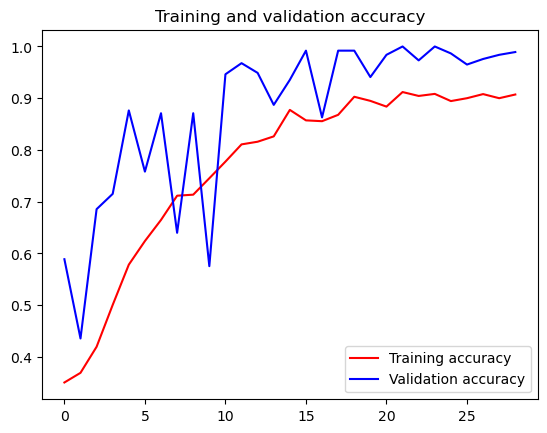

<Figure size 640x480 with 0 Axes>

In [20]:
import matplotlib.pyplot as plt

training_accuracy_values = training_history.history["accuracy"]
validation_accuracy_values = training_history.history["val_accuracy"]
training_loss_values = training_history.history["loss"]
validation_loss_values = training_history.history["val_loss"]

epoch_indices = range(len(training_accuracy_values))

plt.plot(epoch_indices, training_accuracy_values, "r", label="Training accuracy")
plt.plot(epoch_indices, validation_accuracy_values, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.legend(loc=0)
plt.figure()
plt.show()

In [13]:
import numpy as np
from tkinter import Tk, filedialog
from keras.utils import load_img, img_to_array

Tk().withdraw()

selected_image_paths = filedialog.askopenfilenames(
    title="Choose images",
    filetypes=[("Images", "*.jpg *.jpeg *.png *.bmp *.gif")]
)

model_input_target_size = (150, 150)
for image_file_path in selected_image_paths:
    loaded_image = load_img(image_file_path, target_size=model_input_target_size)
    model_input_tensor = img_to_array(loaded_image)
    model_input_tensor = np.expand_dims(model_input_tensor, axis=0)
    prediction_probabilities = classification_model.predict(model_input_tensor, verbose=0)
    print(image_file_path)
    print(prediction_probabilities)

2025-09-13 14:19:33.186 python[3703:3301095] The class 'NSOpenPanel' overrides the method identifier.  This method is implemented by class 'NSWindow'


/Users/shalaga44/Documents/Photo on 13-09-2025 at 11.39 AM.jpg
[[0. 1. 0.]]


In [ ]:
import time
import cv2
import numpy as np
from keras.models import load_model

model_file_path = "rps.h5"
target_image_size = (150, 150)
class_label_names = ["rock", "paper", "sezer"]
normalize_input_by_255 = True

inference_model = load_model(model_file_path)

video_capture = cv2.VideoCapture(0, cv2.CAP_AVFOUNDATION)
if not video_capture.isOpened():
    video_capture = cv2.VideoCapture(0)

video_capture.set(cv2.CAP_PROP_FRAME_WIDTH, 1280)
video_capture.set(cv2.CAP_PROP_FRAME_HEIGHT, 720)

text_font_face = cv2.FONT_HERSHEY_SIMPLEX
program_start_time_seconds = time.time()
frames_processed_count = 0

while True:
    frame_read_ok, frame_bgr = video_capture.read()
    if not frame_read_ok:
        break

    frame_bgr = cv2.flip(frame_bgr, 1)
    frame_rgb = cv2.cvtColor(frame_bgr, cv2.COLOR_BGR2RGB)
    frame_resized_rgb = cv2.resize(frame_rgb, target_image_size, interpolation=cv2.INTER_LINEAR)
    input_tensor = frame_resized_rgb.astype(np.float32)
    if normalize_input_by_255:
        input_tensor /= 255.0
    input_tensor = np.expand_dims(input_tensor, axis=0)

    predicted_probabilities = inference_model.predict(input_tensor, verbose=0)
    if predicted_probabilities.shape[-1] == 1:
        positive_probability = float(predicted_probabilities[0, 0])
        overlay_text = f"{positive_probability:.2%} positive"
    else:
        predicted_index = int(np.argmax(predicted_probabilities[0]))
        predicted_confidence = float(predicted_probabilities[0, predicted_index])
        predicted_label = class_label_names[predicted_index] if predicted_index < len(class_label_names) else f"class {predicted_index}"
        overlay_text = f"{predicted_label}: {predicted_confidence:.1%}"

    frames_processed_count += 1
    frames_per_second = frames_processed_count / (time.time() - program_start_time_seconds + 1e-6)

    output_frame = frame_bgr.copy()
    cv2.putText(output_frame, overlay_text, (20, 40), text_font_face, 1.0, (0, 255, 0), 2, cv2.LINE_AA)
    cv2.putText(output_frame, f"FPS: {frames_per_second:.1f}", (20, 80), text_font_face, 0.7, (255, 255, 255), 1, cv2.LINE_AA)

    cv2.imshow("Live camera inference (press q to quit)", output_frame)
    if cv2.waitKey(1) & 0xFF == ord("q"):
        break

video_capture.release()
cv2.destroyAllWindows()